## Data Augmentation
The technique of generating more data from  existing training samples, the existing sample is augmented with some random 
transformations to yield real-looking images. Lets configure some random transformations to be performed on the image read
by ImageDataGeneration

In [1]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rotation_range = 60,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip = True,
                          fill_mode='nearest')

/usr/lib64/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.


### Let's look at the augemented images of 'Abraham Lincon'

In [2]:
import os
PATH = './'
cartoon_dir = os.path.join(PATH,'Train_Cartoon/')
Test_Cartoon=os.path.join(PATH,'Test_Cartoon/')

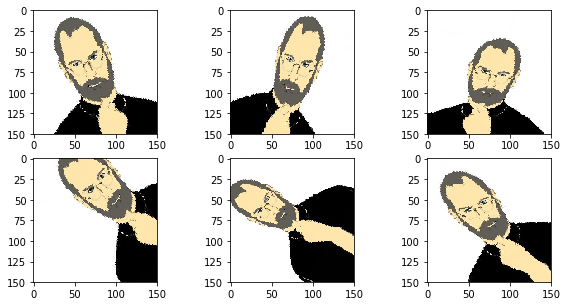

In [4]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

ab_cartoon_dir = os.path.join(cartoon_dir,'Steve_Jobs/')
fname = [os.path.join(ab_cartoon_dir,fname) for fname in os.listdir(ab_cartoon_dir)]
# choosing an image to augment
img_path=fname[1]
img=image.load_img(img_path,target_size=(150,150))# reads and resize the image
x= image.img_to_array(img) # convert to an array
x= x.reshape((1,)+x.shape)

i=0
plt.figure(figsize=(10,5))
for batch in datagen.flow(x,batch_size=1):
    
    plt.subplot(2, 3,i+1)
 
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i % 6==0:
        break
plt.show()


With data-augmentation the same image is never used twice in the network, it will 
just remix the small set of imformation. To further reduce the overfitting,
a **Dropout** layer is added to the model, just before the densely connected classifier

In [6]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3),name ='conv_1'))
model.add(layers.MaxPooling2D((2,2),name='maxpool_1'))
model.add(layers.Conv2D(64,(3,3),activation='relu',name ='conv_2'))
model.add(layers.MaxPooling2D((2,2),name='maxpool_2'))
model.add(layers.Conv2D(128,(3,3),activation='relu',name ='conv_3'))
model.add(layers.MaxPooling2D((2,2),name='maxpool_3'))
model.add(layers.Conv2D(128,(3,3),activation='relu',name ='conv_4'))
model.add(layers.MaxPooling2D((2,2),name='maxpool_4'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu',name='dense_1'))
model.add(layers.Dense(128, activation='relu', name='dense_2'))
model.add(layers.Dense(6,activation='softmax',name='output'))
model.summary()

# compiling the model
from keras import optimizers 
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 74, 74, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 72, 72, 64)        18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 36, 36, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 34, 34, 128)       73856     
_________________________________________________________________
maxpool_3 (MaxPooling2D)     (None, 17, 17, 128)       0         
_________________________________________________________________
conv_4 (Conv2D)              (None, 15, 15, 128)       147584    
__________

### Preprocessing the Data

In [7]:
train_datagen=ImageDataGenerator(rescale =1./255,
                                rotation_range = 40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip = True,
                                fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(cartoon_dir ,
                                                   target_size =(150,150),
                                                   batch_size=30,
                                                   class_mode='categorical')
    
validation_generator = test_datagen.flow_from_directory(Test_Cartoon,
                                                       target_size=(150,150),
                                                       batch_size=30,
                                                       class_mode='categorical')    

Found 4933 images belonging to 6 classes.
Found 2053 images belonging to 6 classes.


In [9]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=50,shuffle =True,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/50
 99/100 [============================>.] - ETA: 0s - loss: 1.7704 - acc: 0.2229

/usr/lib64/python3.4/dist-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


100/100 [==============================] - 51s 508ms/step - loss: 1.7701 - acc: 0.2230 - val_loss: 1.6325 - val_acc: 0.3253
Epoch 2/50
100/100 [==============================] - 41s 405ms/step - loss: 1.6982 - acc: 0.2826 - val_loss: 1.5026 - val_acc: 0.3776
Epoch 3/50
100/100 [==============================] - 39s 393ms/step - loss: 1.6316 - acc: 0.3237 - val_loss: 1.5249 - val_acc: 0.3668
Epoch 4/50
100/100 [==============================] - 38s 385ms/step - loss: 1.5798 - acc: 0.3516 - val_loss: 1.4564 - val_acc: 0.4400
Epoch 5/50
100/100 [==============================] - 39s 389ms/step - loss: 1.5135 - acc: 0.3896 - val_loss: 1.3706 - val_acc: 0.4727
Epoch 6/50
100/100 [==============================] - 38s 376ms/step - loss: 1.4515 - acc: 0.4280 - val_loss: 1.3694 - val_acc: 0.4491
Epoch 7/50
100/100 [==============================] - 40s 399ms/step - loss: 1.4312 - acc: 0.4255 - val_loss: 1.3373 - val_acc: 0.4774
Epoch 8/50
100/100 [==============================] - 38s 375ms/st

In [10]:
model.save('cartoon_2.h5')

## Using a PreTrained Convnet

In [11]:
def plot_acc_loss(acc,val_Acc, loss,val_loss):
    import matplotlib.pyplot as plt
    epochs = range(1,len(acc)+1)
    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.plot(epochs,acc,'bo',label='Training_acc')
    plt.plot(epochs,val_acc,'b',label='Validation_acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(222)
    plt.plot(epochs,loss,'ro',label='Training_loss')
    plt.plot(epochs,val_loss,'r',label='Validation_loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

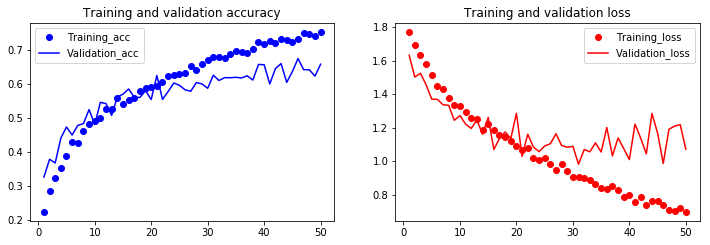

In [12]:
acc= history.history['acc']
val_acc=history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

plot_acc_loss(acc,val_acc, loss,val_loss) 

In [13]:
import pandas as pd
type(val_loss)
ma= {'Acc':acc,'Val_Acc':val_acc,'Loss':loss,'Val_loss':val_loss}
model_Acc= pd.DataFrame(ma)
model_Acc.to_csv("Cartoon_model_2.csv")

In [16]:
print(train_generator.class_indices )


{'Albert_Einstein': 1, 'Donald_Trump': 3, 'Mahatma_Gandhi': 4, 'Abraham_Lincon': 0, 'Barack_Obama': 2, 'Steve_Jobs': 5}


In [17]:
def test_img(img):
    import numpy as np
    import cv2
    import matplotlib.pyplot as plt
    from keras.preprocessing import image
    ob=cv2.imread(img)
    ob.shape
    obimg = cv2.resize(ob,(150,150),interpolation=cv2.INTER_AREA)
#print(obimg.shape)
#converting from BGR to RBG
    obimg = cv2.cvtColor(obimg,cv2.COLOR_BGR2RGB)
    print('Converting Image to Array')
    img_tensor = image.img_to_array(obimg)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    print(img_tensor.shape)
    plt.imshow(img_tensor[0])
    plt.show()
    return(img_tensor)

In [18]:
Pred_Cartoon=os.path.join(PATH,'Prediction_Test/')
#pred_path = os.path.join(PATH,'Prediction_Test/')
Pred_Cartoon

'./Prediction_Test/'

Converting Image to Array
(1, 150, 150, 3)


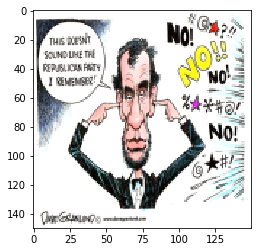

array([[0.03486289, 0.16047357, 0.43258986, 0.12679337, 0.04101055,
        0.20426978]], dtype=float32)

In [19]:
img=os.path.join(Pred_Cartoon,'test3.jpg')
img_tensor=test_img(img)
model.predict(img_tensor)

Converting Image to Array
(1, 150, 150, 3)


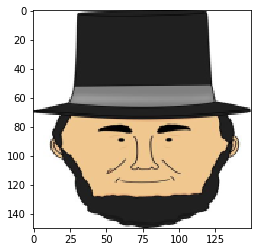

array([[4.7449648e-01, 1.7163451e-01, 1.2047768e-03, 1.2703161e-04,
        1.5651438e-02, 3.3688569e-01]], dtype=float32)

In [20]:
img=os.path.join(Pred_Cartoon,'test5.jpg')
img_tensor=test_img(img)
model.predict(img_tensor)


Converting Image to Array
(1, 150, 150, 3)


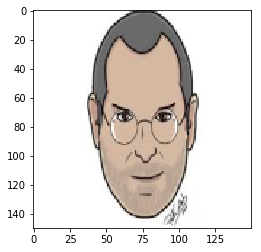

array([[0.05756236, 0.0064372 , 0.04609885, 0.00598318, 0.02670749,
        0.85721093]], dtype=float32)

In [22]:
img=os.path.join(Pred_Cartoon,'test2.jpg')
img_tensor=test_img(img)
model.predict(img_tensor)